# **Linear Regression**

Linear regression is a **supervised machine learning** algorithm. We want to use correlations that predict the outcome of an event based on specific variable data points. Usually the relationship is a straight line that is fit to as many data points as possible. The output is always in format, i.e. numeric values..

Linear regression can be expressed mathematically as:
`y= β0+ β1 x`
where:
- y is the dependent variable
- x is the independent variable
- β0 is the intercept
- β1 is the slope

In [1]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        y = y.reshape(-1)

        # Gradient Descent
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Mean Squared Error: 0.6926651409345591


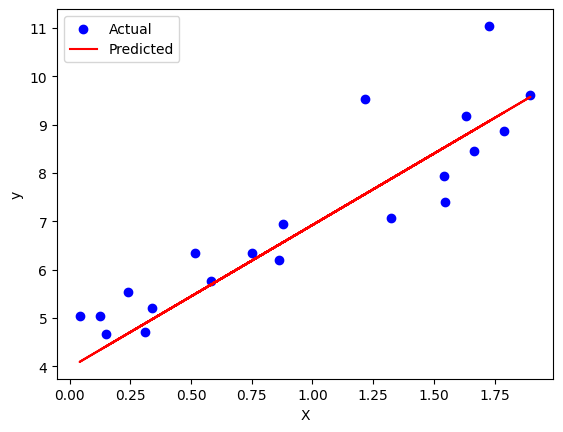

In [2]:
# testing working by Generating a dataset
if __name__ == "__main__":
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    import matplotlib.pyplot as plt

    # linear dataset
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    regressor = LinearRegression(learning_rate=0.01, n_iterations=1000)
    regressor.fit(X_train, y_train)

    predictions = regressor.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error: {mse}')

    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, predictions, color='red', label='Predicted')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()